In [1]:
%pylab inline
from pomegranate import *

Populating the interactive namespace from numpy and matplotlib


In [61]:
driver_quality = DiscreteDistribution( { 'Good': 0.80, 'Bad': 0.20 } )
driving_history = DiscreteDistribution( { 'PreviousAccident': 0.5, 'NoPreviousAccident': 0.5 } )

vehicle_size = DiscreteDistribution( { 'Compact': 0.65, 'SUV': 0.35 } )
vehicle_year = DiscreteDistribution( { 'After2000': 0.60, 'Before2000': 0.40 } )

accident = ConditionalProbabilityTable(
    [[ 'Good', 'Compact', 'After2000', 'Severe', 0.01 ],
     [ 'Good', 'Compact', 'After2000', 'Mild', 0.04 ],
     [ 'Good', 'Compact', 'After2000', 'None', 0.95 ],
     [ 'Bad', 'Compact', 'After2000', 'Severe', 0.03 ],
     [ 'Bad', 'Compact', 'After2000', 'Mild', 0.12 ],
     [ 'Bad', 'Compact', 'After2000', 'None', 0.85 ],     
     [ 'Good', 'SUV', 'After2000', 'Severe', 0.01 ],
     [ 'Good', 'SUV', 'After2000', 'Mild', 0.14 ],
     [ 'Good', 'SUV', 'After2000', 'None', 0.85 ],
     [ 'Bad', 'SUV', 'After2000', 'Severe', 0.02 ],
     [ 'Bad', 'SUV', 'After2000', 'Mild', 0.23 ],
     [ 'Bad', 'SUV', 'After2000', 'None', 0.75 ],     
     [ 'Good', 'Compact', 'Before2000', 'Severe', 0.05 ],
     [ 'Good', 'Compact', 'Before2000', 'Mild', 0.10 ],
     [ 'Good', 'Compact', 'Before2000', 'None', 0.85 ],
     [ 'Bad', 'Compact', 'Before2000', 'Severe', 0.10 ],
     [ 'Bad', 'Compact', 'Before2000', 'Mild', 0.15 ],
     [ 'Bad', 'Compact', 'Before2000', 'None', 0.75 ],     
     [ 'Good', 'SUV', 'Before2000', 'Severe', 0.02 ],
     [ 'Good', 'SUV', 'Before2000', 'Mild', 0.23 ],
     [ 'Good', 'SUV', 'Before2000', 'None', 0.75 ],
     [ 'Bad', 'SUV', 'Before2000', 'Severe', 0.05 ],
     [ 'Bad', 'SUV', 'Before2000', 'Mild', 0.30 ],
     [ 'Bad', 'SUV', 'Before2000', 'None', 0.65 ]], [driver_quality, vehicle_size, vehicle_year])

cost = ConditionalProbabilityTable(
    [[ 'Severe', 'Low', 0.2 ],
     [ 'Mild', 'Low', 0.4 ],
     [ 'None', 'Low', 0.95 ],
     [ 'Severe', 'High', 0.9 ],
     [ 'Mild', 'High', 0.6 ],
     [ 'None', 'High', 0.05 ]], [accident])


In [62]:
s0 = Node( vehicle_year, name="vehicle_year" )
s1 = Node( vehicle_size, name="vehicle_size" )
s2 = Node( driver_quality, name="driver_quality" )
s3 = Node( accident, name="accident" )
s4 = Node( cost, name="cost" )
network = BayesianNetwork( "Insurance" )
network.add_states(s0, s1, s2, s3, s4)
network.add_edge( s0, s3 )
network.add_edge( s1, s3 )
network.add_edge( s2, s3 )
network.add_edge( s3, s4 )

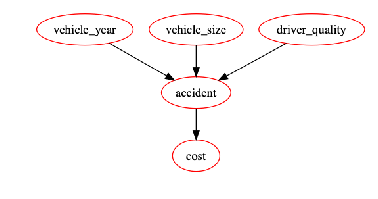

In [63]:
network.bake()
network.plot()